<a href="https://colab.research.google.com/github/sudhirslab/beyondllm/blob/main/Chat_with_youtube_video-beyond_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BeyondLLM

## Build - Rapid Experiment - Evaluate - Repeat

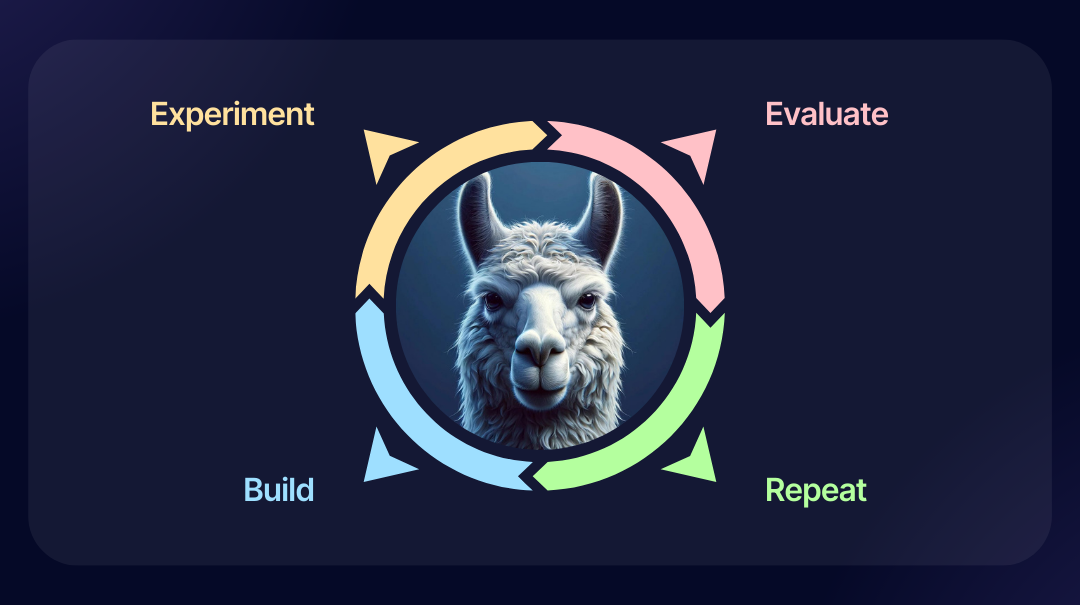


In this quick start guide, we'll demonstrate how to create a Chat with YouTube video RAG application using BeyondLLM with less than 8 lines of code. This 8 lines of code includes:

- Getting custom data source
- Retrieving documents
- Generating LLM responses
- Evaluating embeddings
- Evaluating LLM responses

## Installation

In [ ]:
!pip install beyondllm

## Import BeyondLLM

In [ ]:
from beyondllm import source,retrieve,embeddings,llms,generator

In [ ]:
from getpass import getpass
import os

os.environ['GOOGLE_API_KEY'] = getpass()

··········


## Chat with YouTube Video

### Approach-1: Using Default LLM and Embeddings

Build customised RAG in less than 5 lines of code using BeyondLLM.

YouTube is not a default datatype, thats where you need to install it

```
pip install youtube_transcript_api,llama-index-readers-youtube-transcript
```

In [ ]:
data = source.fit("https://www.youtube.com/watch?v=oJJyTztI_6g",dtype="youtube",chunk_size=1024,chunk_overlap=0)

The feature you're trying to use requires an additional library(s):youtube_transcript_api,llama-index-readers-youtube-transcript. Would you like to install it now? [y/N]: y


In [ ]:
print(data)

[TextNode(id_='b7deaf24-4af6-4f04-950a-984ccaa62ef8', embedding=None, metadata={'video_id': 'oJJyTztI_6g'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='e72d09f7-e345-4292-8c7e-f7aaa8571dbc', node_type=<ObjectType.TEXT: '1'>, metadata={'video_id': 'oJJyTztI_6g'}, hash='01e83d0060377cdc09be5d73e4b038357a35c1f541dcc791f953d29f65a7f61f')}, text="hi everyone uh have you ever struggled\nto learn some complex data science\ntopics\nwell I I did I personally did and I used\nto resort to online forums and not just\nthat like you know I've seen several\nthousands of um community members at AI\nPlanet struggle with complex topics\neither they resort to online forums\nDiscord or they either go to some\nmentors who can help them in the\nthat's what we always thought how can we\nsolve this problem and I'm very excited\nto introduce you to Jupiter\nwhich is the AI Guru that would that\nwould rise and also simpl

In [ ]:
retriever = retrieve.auto_retriever(data,type="normal",top_k=3)

In [ ]:
pipeline = generator.Generate(question="what tool is video mentioning about?",retriever=retriever)

LLM is explicitly disabled. Using MockLLM.


In [ ]:
print(pipeline.call())

Jupiter


## Gradio Integration

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def predict(message, history, system_prompt, tokens):
  response =  pipeline.call()
  return response

with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.ClearButton([msg, chatbot])

    def predict(message, chat_history):
      response = pipeline.call()
      chat_history.append((message, response))
      return "", chat_history


    msg.submit(predict, [msg, chatbot], [msg, chatbot])

demo.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://097ff104d345ecf034.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
